# Detecting SSE events in Japan using CNN

In [40]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date

Loading Known SSE events

In [41]:
knownSSE = pd.read_csv("japanSEE/sloweqjapan2003-2022.csv", parse_dates={"date": ["year", "month", "day"]})
sortedSSE = knownSSE.sort_values(by="date").drop_duplicates()
startdate = sortedSSE.iloc[0]['date']
enddate = sortedSSE.iloc[sortedSSE.shape[0]-1]['date']
print("Known SSE start date: ", startdate)
print("Known SSE end date: ", enddate)

Known SSE start date:  2003-02-02 00:00:00
Known SSE end date:  2019-10-12 00:00:00


We have SSE data from: 2003-02-02 to 2019-10-12

In [44]:
# Choose directory
directory_name = "./japandata"
files = os.listdir(directory_name)

# Process data
GNSSdata = []
start_date = '2004-01-01'
end_date = '2020-01-01'
index = 0
numberofdays = -(date(2003, 1, 1) - date(2020, 1, 1)).days
for filename in files:
    if filename.endswith(".res"):
        # read in file
        path = os.path.join(directory_name, filename)
        GNSSdataframe = pd.read_csv(path, delim_whitespace=True, header=None)

        # parse data
        GNSSdataframe.columns = ["date", "NS_displacement", "EW_displacement", "UD_displacement", "Length_change"]
        GNSSdataframe["date"] = pd.to_datetime(GNSSdataframe["date"])

        post = GNSSdataframe.loc[-(GNSSdataframe.date < start_date) & (GNSSdataframe.date <= end_date)]
        print(index, ': ', post.shape[0])
        index = index+1


        GNSSdata.append(post)

0 :  4291
1 :  5435
2 :  3328
3 :  5831
4 :  5838
5 :  4727
6 :  5831
7 :  4782
8 :  4814
9 :  5397
10 :  5830
11 :  3556
12 :  5811
13 :  5745
14 :  5833
15 :  3268
16 :  4742
17 :  5721
18 :  5837
19 :  5694
20 :  5423
21 :  5468
22 :  5818
23 :  3343
24 :  5837
25 :  3354
26 :  4377
27 :  4652
28 :  5832
29 :  5825
30 :  4724
31 :  3343
32 :  2572
33 :  5470
34 :  5835
35 :  5835
36 :  5820
37 :  4300
38 :  4655
39 :  5832
40 :  5440
41 :  3351
42 :  4291
43 :  5806
44 :  5839
45 :  3350
46 :  5839
47 :  5834
48 :  5470
49 :  5838
50 :  4050
51 :  5827
52 :  5840
53 :  5826
54 :  5839
55 :  5805
56 :  5466
57 :  5825
58 :  5430
59 :  5825
60 :  5832
61 :  3270
62 :  5445
63 :  4308
64 :  3355
65 :  5465
66 :  5838
67 :  5835
68 :  5829
69 :  934
70 :  5833
71 :  5465
72 :  5828
73 :  5824
74 :  3352
75 :  5832
76 :  5457
77 :  3354
78 :  5761
79 :  5824
80 :  4010
81 :  5839
82 :  5838
83 :  3978
84 :  1811
85 :  5832
86 :  5799
87 :  5466
88 :  5466
89 :  5817
90 :  5814
91 :  4723

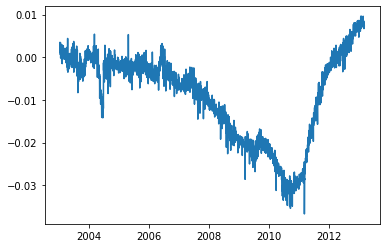

In [7]:
plt.plot(GNSSdata[2]['date'], GNSSdata[2]['EW_displacement'])

In [43]:
print(GNSSdata[3].head())
print(GNSSdata[3].tail())


          date  NS_displacement  EW_displacement  UD_displacement  \
283 2004-01-01          -0.0006           0.0202          -0.0023   
284 2004-01-02          -0.0001           0.0213           0.0008   
285 2004-01-03           0.0000           0.0199           0.0012   
286 2004-01-04          -0.0009           0.0201           0.0027   
287 2004-01-05          -0.0008           0.0197           0.0006   

     Length_change  
283         0.0202  
284         0.0217  
285         0.0220  
286         0.0207  
287         0.0228  
           date  NS_displacement  EW_displacement  UD_displacement  \
6109 2019-12-28          -0.1471           0.4536          -0.0632   
6110 2019-12-29          -0.1467           0.4543          -0.0584   
6111 2019-12-30          -0.1474           0.4520          -0.0594   
6112 2019-12-31          -0.1462           0.4541          -0.0587   
6113 2020-01-01          -0.1471           0.4548          -0.0576   

      Length_change  
6109         0.4